In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clini_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
all_data = pd.merge(clini_data, mouse_data, on="Mouse ID")

# Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
avg_tumor_volume = all_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
avg_tumor_volume = avg_tumor_volume.reset_index()

# Preview DataFrame
avg_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = all_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumor_volume = sem_tumor_volume.reset_index()

# Preview DataFrame
sem_tumor_volume.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames

###For this one, we're adjusting the avg_tumor_volume data

#1. Set Timepoint as Index 
dfmean_adjust01 = avg_tumor_volume.set_index('Timepoint')

#2. Use pandas to manipulate data frame to pivot the values for 'Drug' to be columns.
###This will set the column axis to list all the different drugs and set timepoint as the row axis.
dfmean_adjust02 = dfmean_adjust01.pivot(columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
dfmean_adjust02.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


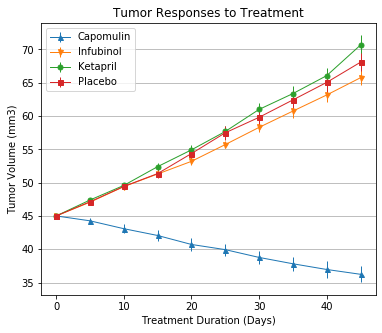

In [11]:
# Generate the Plot (with Error Bars)

#Create the graph with a size that makes the data look presentable.
plt.figure(figsize=(6,5))

#We'll iterate through lists to get our values that we need to populate the plot values.
list_drug = ['Capomulin','Infubinol','Ketapril','Placebo']
list_marker = ['^-','v-','o-','s-']

#Create the axis into a variable that can be easily called out.
x_ax = dfmean_adjust02.index.values

#Iterate using n as the ticker variable for the length of list_drug = 4!
for n in range(len(list_drug)):
    
    #References to our Standard Error database to provide the Standard Error value in column 'Tumor Volume'
    valsem = sem_tumor_volume[sem_tumor_volume['Drug']==list_drug[n]]['Tumor Volume (mm3)']
    
    #Plot out everything in the iteration!
    plt.errorbar(x_ax, dfmean_adjust02[list_drug[n]], valsem, fmt=list_marker[n], linewidth=1.0,markersize=5.0)

#legend
plt.legend(list_drug, loc="best")

#title
plt.title('Tumor Responses to Treatment')

#axis naming
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Tumor Volume (mm3)')

#horizontal lines per y-tick
plt.grid(axis='y')

# Save the Figure
plt.savefig("Images/TumorResponse_Treatment.png")

# Show the figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [31]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
avgMetastatic = pd.DataFrame(all_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean())
avgMetastatic = avgMetastatic.reset_index()

# Preview DataFrame
avgMetastatic.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [32]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
sem_metastatic = pd.DataFrame(all_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem())
sem_metastatic = sem_metastatic.reset_index()

# Preview DataFrame
sem_metastatic.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [33]:
# Minor Data Munging to Re-Format the Data Frames

###We'll use the same format that we used for volume.

#1. Set Timepoint as Index (adj1 is simply shorthand for adjustment 1)
adj1_avgmetastatic = avgMetastatic.set_index('Timepoint')

#2. Use pandas to manipulate data frame to pivot the values for 'Drug' to be columns.
###This will set the column axis to list all the different drugs and set timepoint as the row axis.
reformat_avgmeta = adj1_avgmetastatic.pivot(columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
reformat_avgmeta.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


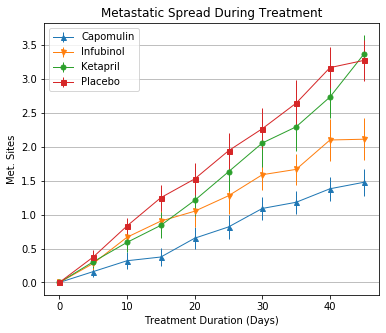

In [38]:
# Generate the Plot (with Error Bars)

###Re-using the script for the previous plot for the Mean of Tumor Volume.

#Create the graph with a size that makes the data look presentable.
plt.figure(figsize=(6,5))

#We'll iterate through lists to get our values that we need to populate the plot values.
list_drug = ['Capomulin','Infubinol','Ketapril','Placebo']
list_marker = ['^-','v-','o-','s-']

#Create the axis into a variable that can be easily called out.
x_ax = reformat_avgmeta.index.values

#Iterate using n as the ticker variable for the length of list_drug = 4!
for n in range(len(list_drug)):
    
    #References to our Standard Error database to provide the Standard Error value in column 'Tumor Volume'
    valsem = sem_metastatic[sem_metastatic['Drug']==list_drug[n]]['Metastatic Sites']
    
    #Plot out everything in the iteration!
    plt.errorbar(x_ax, reformat_avgmeta[list_drug[n]], valsem, fmt=list_marker[n], linewidth=1.0,markersize=5.0)

#legend
plt.legend(list_drug, loc="best")

#title
plt.title('Metastatic Spread During Treatment')

#axis labels
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')

#add horizontal lines per y-axis tick.
plt.grid(axis='y')

# Save the Figure
plt.savefig("Images/Metastatic_Treatment.png")

# Show the figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [65]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
totalcounts = pd.DataFrame((all_data.groupby(['Drug','Timepoint']))["Mouse ID"].count())
totalcounts = totalcounts.reset_index()
totalcounts.rename(columns={'Mouse ID':'Mouse Count'},inplace=True)

# Preview DataFrame
totalcounts.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [66]:
# Minor Data Munging to Re-Format the Data Frames

#1. Set Timepoint as Index (adj1 is simply shorthand for adjustment 1)
adj1_totalcounts = totalcounts.set_index('Timepoint')

#2. Use pandas to manipulate data frame to pivot the values for 'Drug' to be columns.
###This will set the column axis to list all the different drugs and set timepoint as the row axis.
reformat_totalcounts = adj1_totalcounts.pivot(columns='Drug',values='Mouse Count')

# Preview that Reformatting worked
reformat_totalcounts.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


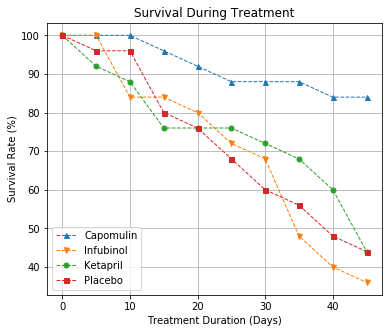

In [93]:
# Generate the Plot (with Error Bars)

#Create the graph with a size that makes the data look presentable.
plt.figure(figsize=(6,5))

#We'll iterate through lists to get our values that we need to populate the plot values.
list_drug = ['Capomulin','Infubinol','Ketapril','Placebo']
list_marker = ['^--','v--','o--','s--']

#Create the axis into a variable that can be easily called out.
x_ax = reformat_totalcounts.index.values

#Iterate using n as the ticker variable for the length of list_drug = 4!
for n in range(len(list_drug)):
    
    #References to our Standard Error database to provide the Standard Error value in column 'Tumor Volume'
    value = (reformat_totalcounts[list_drug[n]]/reformat_totalcounts[list_drug[n]].iloc[0])*100
    
    #Plot out everything in the iteration!
    plt.plot(x_ax,value,list_marker[n],linewidth=1.0,markersize=5.0)

#legend
plt.legend(list_drug, loc="best")

#title
plt.title('Survival During Treatment')

#axis labels
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Survival Rate (%)')

#add full grid.
plt.grid()

# Save the Figure
plt.savefig("Images/Survival_Rate.png")

# Show the figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [116]:
# Calculate the percent changes for each drug
#Thoughts: percent changes for each drug most likely means taking the last value and divide it by the first value.
#This means... using iloc(0) for initial and then iloc(-1) for the last value.

#if x is the initial value and y is the last value, the formula should be:
    #[(y-x)/x]*100
    #y = (dfmean_adjust02.iloc[-1]
    #x = dfmean_adjust02.iloc[0]
    
summ_calc = ((dfmean_adjust02.iloc[-1]-dfmean_adjust02.iloc[0])/dfmean_adjust02.iloc[0])*100

# Display the data to confirm
summ_calc

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

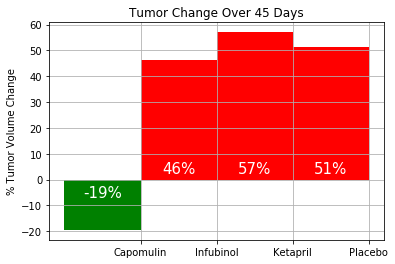

In [213]:
### Store all Relevant Percent Changes into a Tuple

#Let's do this by creating a list first.
list_drug = ['Capomulin','Infubinol','Ketapril','Placebo']
list_data = [summ_calc['Capomulin'], summ_calc['Infubinol'],summ_calc['Ketapril'],summ_calc['Placebo']]

#Convert the lists into tuples.
list_drug = tuple(list_drug)
list_data = tuple(list_data)

### Splice the data between passing and failing drugs

#Was about to go with a dictionary and then have it spit out values later on, but creating multiple lists sounds simpler.
success_label = []
success_value = []
failed_label = []
failed_value = []

for x in range(len(list_drug)):

    if list_data[x] < 0: #if the tumor shrunk, and therefore negative, the drug was a success.
        success_label.append(list_drug[x])
        success_value.append(list_data[x])
    else:
        failed_label.append(list_drug[x])
        failed_value.append(list_data[x])

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots(figsize=(6,4))
width = -1
plt.title('Tumor Change Over 45 Days')
plt.ylabel('% Tumor Volume Change')
plt.grid()

#Plot the successful drugs
success_bar = ax.bar(success_label, success_value,width, align='edge', color='g')

#Plot the failed drugs
failed_bar = ax.bar(failed_label, failed_value,width,align='edge', color='r')

# Use functions to label the percentages of changes

def labelit(bar, ax):
    
    #set the y limits into values.
    (ymin, ymax) = ax.get_ylim()
    #set up variable to contain height of y.
    yheight = ymax - ymin

    for n in bar:
        height = n.get_height()
        #Basically if the height is negative we're adding the label at x=-8
        if height <0:
            labelLoc = -8
            
        #Otherwise, we stack it up roughly at y=1.5
        else:
            labelLoc = 1.5
        
        #Place the text!
        ax.text(n.get_x() + n.get_width()/2.,labelLoc,'%.0f' % int(height) + "%",color='w',fontsize=15,ha='center',va='bottom')

# Call functions to implement the function calls
labelit(success_bar, ax)
labelit(failed_bar, ax)

# Save the Figure
plt.savefig("Images/TumorChange_Bar.png")

# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)